<a href="https://colab.research.google.com/github/Shravani703/Advertising-Response-Prediction/blob/main/Binary_Classification_of_Digits_in_SkLearn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this example we will use Logistic Regression on the MNIST Dataset to classify handwritten digits. We will focus on the binary classification problem, and later in class we will revisit how to do the multi-class problem using Torch.

In [1]:
import matplotlib.pyplot as plt
import numpy as np


from sklearn.datasets import fetch_openml
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.utils import check_random_state
from sklearn.pipeline import Pipeline

This line downloads the dataset and stores it. It may take up to a minute.

In [2]:
X, y = fetch_openml("mnist_784", version=1, return_X_y=True, as_frame=False)


What is the shape of `X`? What do the dimensions represent? What is the first row of `X`?

In [12]:
# TODO
X.shape
X[0,:]

array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   

Let's visualize a bunch of images from the dataset

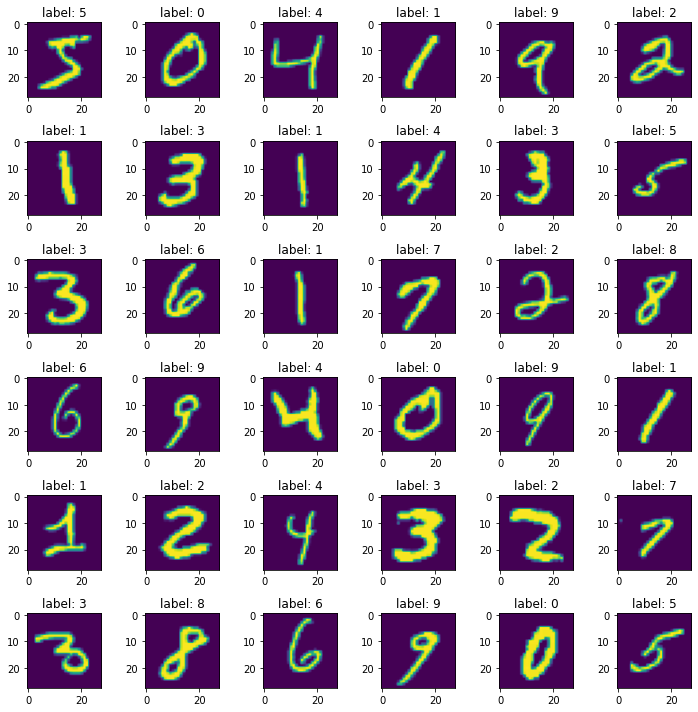

In [14]:
import matplotlib.pyplot as plt
fix, ax = plt.subplots(6,6, figsize=(10,10))

for i in range(36):
    img = X[i]
    label = y[i]
    ax[int(i/6), int(i%6)].imshow(img.reshape(28,28))
    ax[int(i/6), int(i%6)].set_title('label: {}'.format(label))
plt.tight_layout()
plt.show()

The next block restricts our dataset to the digits 4 and 7 and then takes train/test split of the data.

In [15]:
idx = (y=='4') | (y=='7' )
X = X[idx]
y = y[idx]

Now let's take a train/test split of the data. Make the test size, 20% of the train size.

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.2)#TODO train test split

The following makes a pipeline with a standard scaler and a logistic regression function. Note that I use a "l1" regression. The `C` parameter is $1/\lambda$ from class. 

In [17]:
pipe = Pipeline([('scaler', StandardScaler()), 
                 ('logistic', LogisticRegression(C=.1, penalty="l2", max_iter=10000))])


Now fit the pipeline to the train and test set, and report the train and test set accuracy. Hint: `pipe.score` can be used to learn the accuracy.


In [18]:
#TODO fit pipeline to train set
pipe.fit(X_train, y_train)
train_accuracy = pipe.score(X_train, y_train)
test_accuracy = pipe.score(X_test, y_test)
print('train accuracy', train_accuracy)
print('test accuracy', test_accuracy)


train accuracy 0.9974320375453821
test accuracy 0.990084985835694


Now let's look at 36 images we got wrong on the test dataset and see what the prediction was. Do the mistakes make sense?

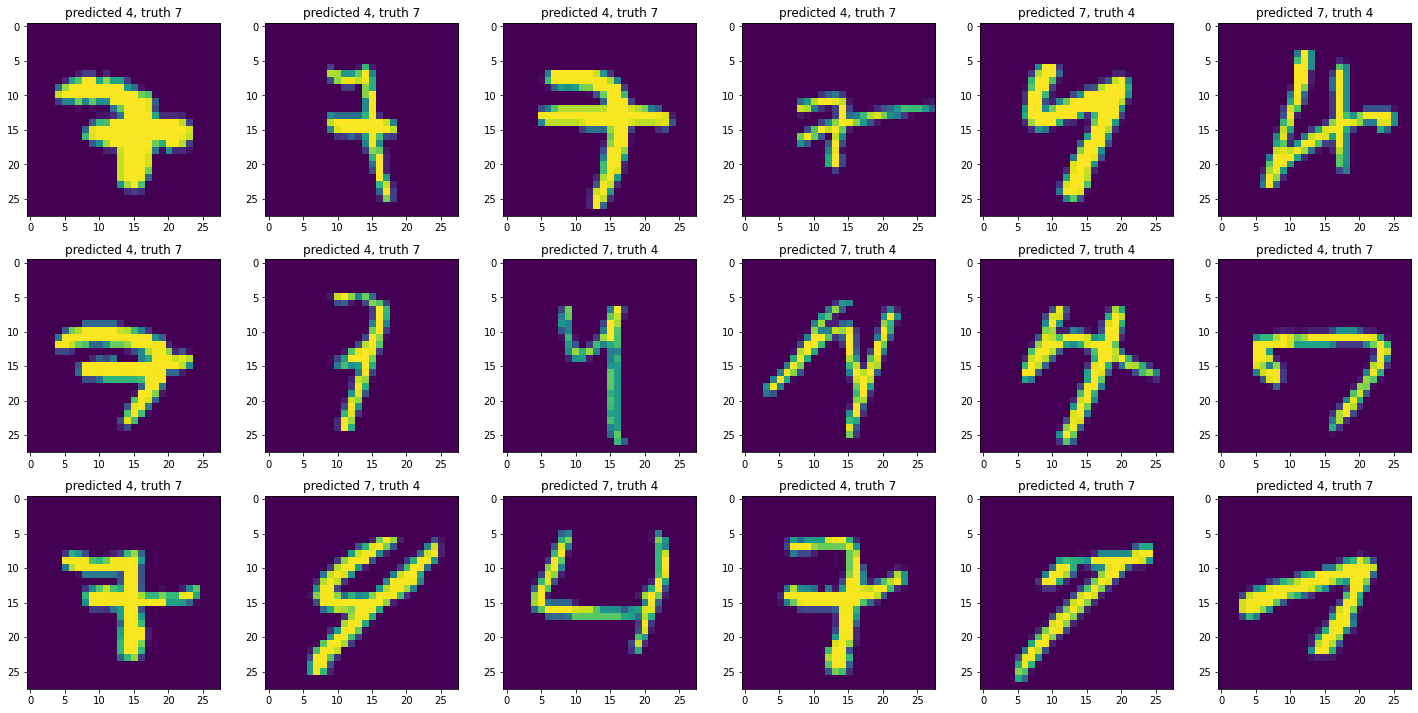

In [19]:
fix, ax = plt.subplots(3,6, figsize=(20,10))

total = 0
i = 0
y_predict = pipe.predict(X_test)
while total < 18:
    if y_test[i] != y_predict[i]:
        ax[int(total/6), total%6].imshow(X_test[i].reshape(28,28))
        ax[int(total/6), total%6].set_title('predicted {}, truth {}'.format(y_predict[i], y_test[i]))
        total += 1
    i+=1
plt.tight_layout()
plt.show()
    

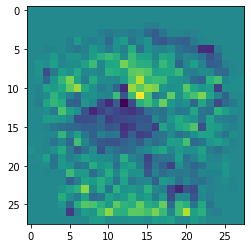

In [20]:
plt.imshow(pipe[1].coef_.reshape(28,28))